READING DATA FROM CSV FILE:

The number of rows in X and y are equal


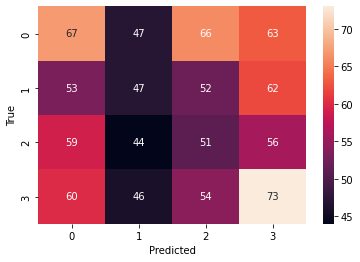

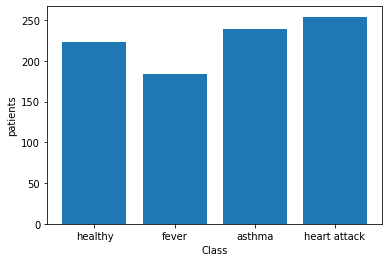

In [33]:

import csv
from sklearn.metrics import  confusion_matrix
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the sensor data from the CSV file
with open('/Users/sumanth/sensor_data.csv', 'r') as file:
    reader = csv.reader(file)
    data = list(reader)
    headers = data[0]
    data = data[1:]



# Extract the feature variables (heart rate, blood pressure, temperature)
# and the target variable (condition)
X = [[float(row[2]), float(row[3]), float(row[4])] for row in data]
y = [row[5] for row in data]

# check if the number of rows in X and y are equal
if len(X) != len(y):
    print("The number of rows in X and y are not equal")
else:
    print("The number of rows in X and y are equal")



# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create an instance of the class
rf_model = rf()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)



# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Define a list of possible conditions
conditions = ['healthy', 'fever', 'asthma', 'heart attack']

# Create a dictionary to store the count of each class in the predictions
pred_count = {condition: 0 for condition in conditions}
for pred in y_pred:
    pred_count[pred] += 1

#Plotting the bar plot
plt.bar(pred_count.keys(), pred_count.values())
plt.xlabel('Class')
plt.ylabel('patients')
plt.show()

